<h1><center>4. Customer Segmentation</center></h1>

<p style='text-align: center;'> 
Jishnu Jeevan <br>
Department of Computer Science <br>
M.Tech Computer and Information Science <br>
jishnujeevan@cusat.ac.in <br>
</p>

<h2><center> Assignemt Objective</center></h2>
<p style='text-align: justify;'>
The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.<br>
The major aim is to perform clustering analysis using algorithms like hClust,PAM,kMeans,mclust and provide inferences accordingly.<br>
Link for the dataset:
<b>https://archive.ics.uci.edu/ml/datasets/Wholesale+customers</b>
</p>

<h2>The data set contains the following columns i.e features</h2>
<p style='text-align: justify;'>
1. FRESH: annual spending (m.u.) on fresh products (Continuous)<br>
2. MILK: annual spending (m.u.) on milk products (Continuous)<br>
3. GROCERY: annual spending (m.u.)on grocery products (Continuous)<br>
4. FROZEN: annual spending (m.u.)on frozen products (Continuous)<br>
5. DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)<br>
6. DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)<br>
7. CHANNEL: customersale Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)<br>
8. REGION: customersale Region - Lisnon, Oporto or Other (Nominal)<br>

(Minimum, Maximum, Mean, Std. Deviation)<br>
FRESH ( 3, 112151, 12000.30, 12647.329)<br>
MILK (55, 73498, 5796.27, 7380.377)<br>
GROCERY (3, 92780, 7951.28, 9503.163)<br>
FROZEN (25, 60869, 3071.93, 4854.673)<br>
DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854)<br>
DELICATESSEN (3, 47943, 1524.87, 2820.106)<br>

REGION Frequency<br>
Lisbon 77<br>
Oporto 47<br>
Other Region 316<br>
Total 440<br>

CHANNEL Frequency<br>
Horeca 298<br>
Retail 142<br>
Total 440<br>

Here there  is no output variable. We need to use clustering to find meaning in the data
</p>

### 1. Importing the required libraries

In [92]:
# For reading of the data set
import numpy as np 
import pandas as pd

# To surpress warning messages
import warnings
warnings.filterwarnings("ignore")

#plotting libraries
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# For clustering
from sklearn.cluster import KMeans 

# For scalling
from sklearn.preprocessing import MinMaxScaler

### 2. Load the dataset .

In [93]:
data = pd.read_csv("./Wholesale customers data.csv")

### 3. Let us get some information about the dataset 

#### 3a. Let us find out its shape

In [94]:
data.shape

(440, 8)

#### 3b. Let us get some more description about the dataset

In [95]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### 3c. Let us see what all datatyes we have

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


#### 3c. Let us see if there are any missing values

In [97]:
pd.isnull(data).sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

#### There are no missing values. So we don't need to worry about that

#### 3d. Let us get the details about the regions

In [98]:
data.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

#### 3e. Let us get details about the channels

In [99]:
data.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

#### 3f. Let us scale the features

In [100]:
# Create a min max scalar
scaler = MinMaxScaler()

# Scale the data
data_scaled = scaler.fit_transform(data)

# Convert it into a pandas data frame
data_scaled = pd.DataFrame(data_scaled,columns=data.columns)

# Display the head
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [101]:
# Let us look at how the regions have changed
data_scaled.Region.value_counts()

1.0    316
0.0     77
0.5     47
Name: Region, dtype: int64

In [102]:
# Let us look at how the channels have changed
data_scaled.Channel.value_counts()

0.0    298
1.0    142
Name: Channel, dtype: int64

### 4. Data visualization

#### 4a. Let us look at a pairwise plot

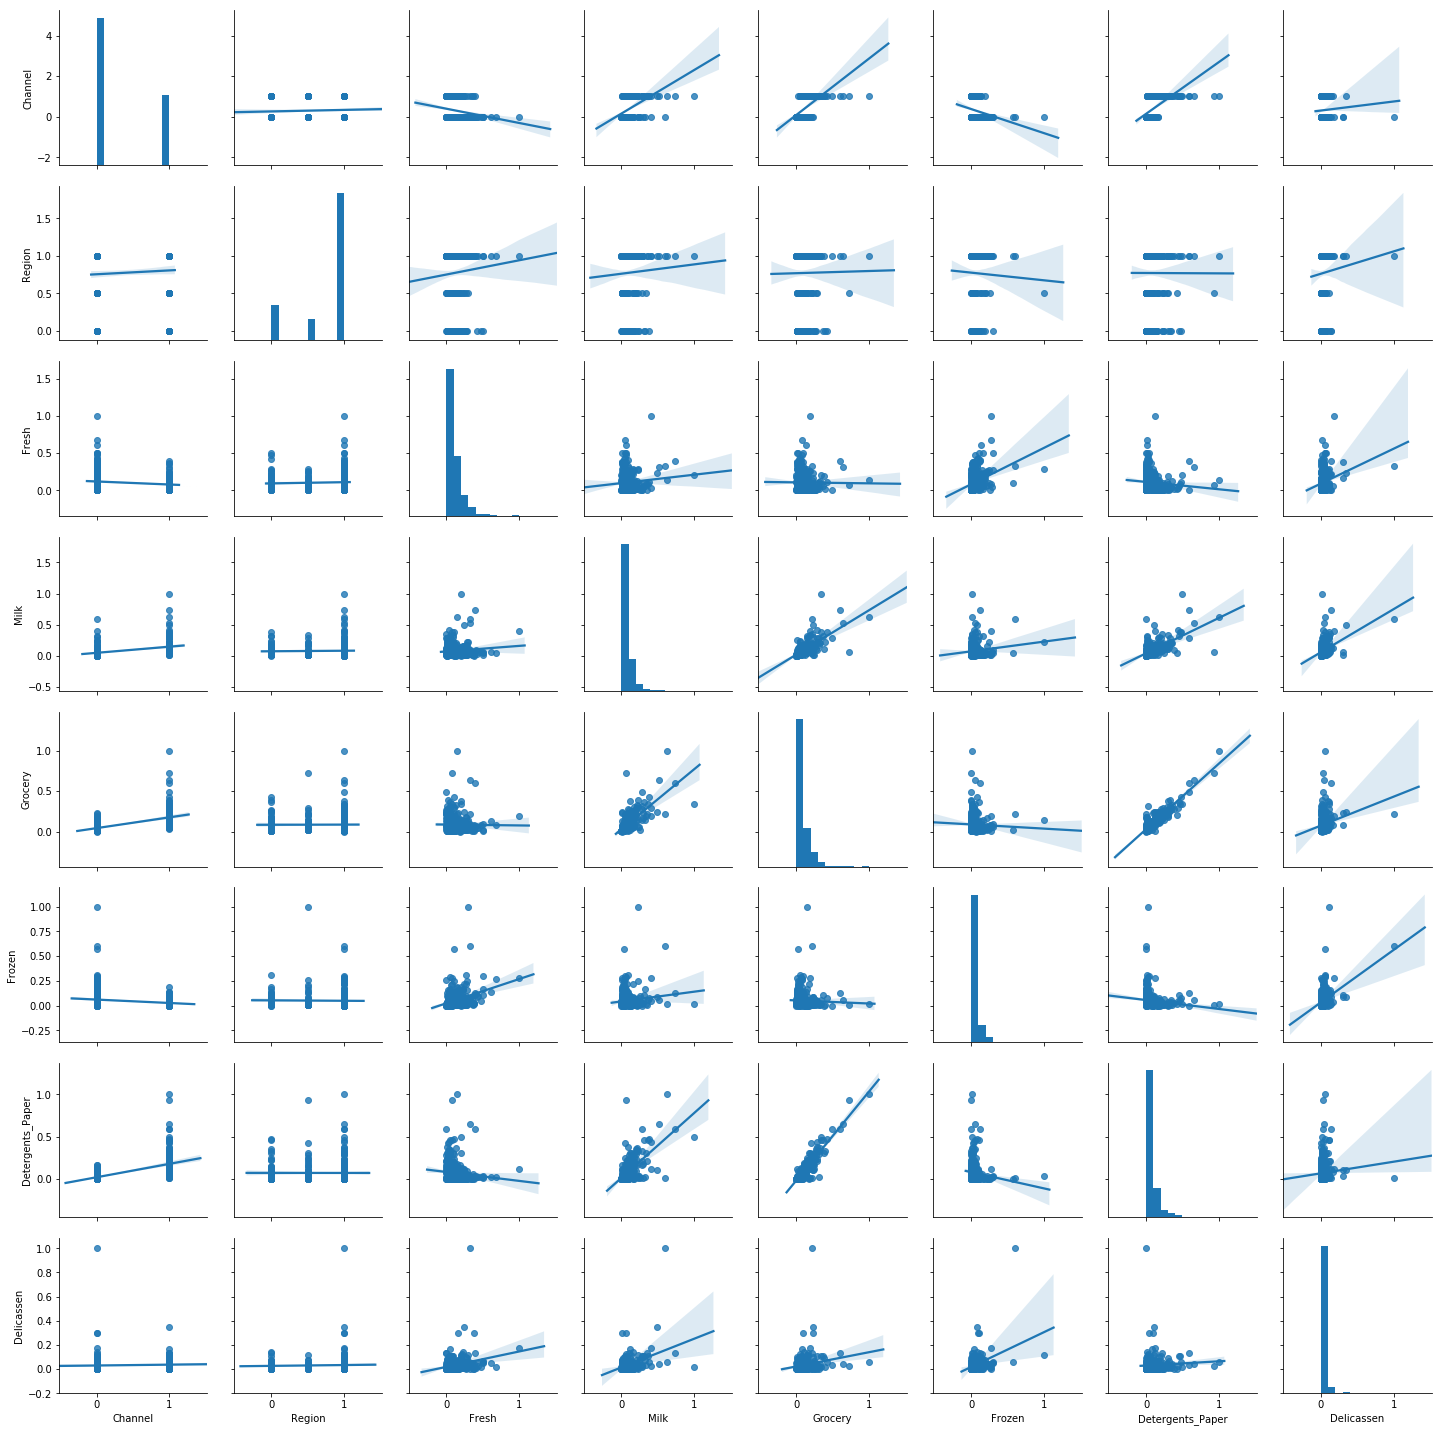

In [103]:
sns.pairplot(data_scaled, kind="reg")

#### 4b. Let us look at a corelation matrix and a heat map

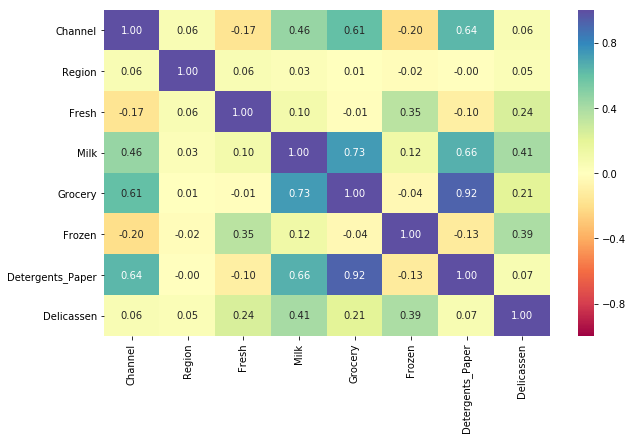

In [104]:
plt.figure(figsize=(10,6))
sns.heatmap(data_scaled.corr(),annot=True,fmt='.2f',vmin=-1,vmax=1,cmap='Spectral')
plt.show()

### 5. Clustering

#### 5a. Let us use elbow method to find the optimal value for k

In [105]:
# Select the range
cluster_range = range(1,10)
inertia=[]
for cluster in cluster_range:
    model = KMeans(cluster)
    model.fit(data_scaled)
    inertia.append(model.inertia_)

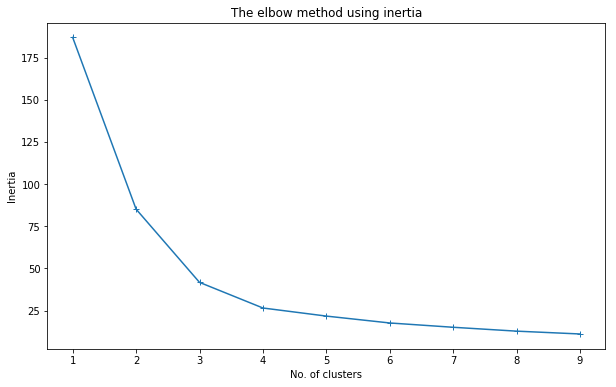

In [106]:
#PLotting Elbow curve for finding Optimal K value
plt.figure(figsize=[10,6])
plt.title('The elbow method using inertia')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.plot(list(cluster_range),inertia,marker='+')
plt.show()

In [107]:
# Listing out the inertia for each cluster
for index,val in enumerate(inertia): 
    print(str(index)+' : '+str(val)) 

0 : 186.89185814102916
1 : 85.11692833765338
2 : 41.73172344212006
3 : 26.542897831987613
4 : 21.746762042487152
5 : 17.668755555276352
6 : 15.118692182500082
7 : 12.821378336622946
8 : 11.14545838335345


#### From the figure above we can see that point at which the graph starts to decrease in a linear fashion is at 4. So the number of cluserts is 4

### 6. Now we are going to use k = 4 to cluster the data

In [108]:
model = KMeans(n_clusters=4,random_state=0)
model.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [109]:
# Copy it to a new variable
dataset_final = data.copy()
dataset_final.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [110]:
# Create a new colummns called cluster
dataset_final['clusters']=model.predict(data_scaled)
dataset_final.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,3


In [111]:
# Show each cluster
#cluster profiles
clust_prof = dataset_final.groupby(['clusters'],as_index=False).mean()
clust_prof

,clusters,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,1.0,3.000000,13878.052133,3486.981043,3886.734597,3656.900474,786.682464,1518.284360
1,1,2.0,1.513514,6273.135135,9965.864865,17370.135135,2048.243243,8320.270270,1546.918919
2,2,1.0,1.321839,12499.402299,3366.218391,4145.011494,3969.804598,799.965517,1167.781609
3,3,2.0,3.000000,9831.504762,10981.009524,15953.809524,1513.200000,6899.238095,1826.209524


In [112]:
# Display the dataset with the cluster
dataset_final

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,3
5,2,3,9413,8259,5126,666,1795,1451,3
6,2,3,12126,3199,6975,480,3140,545,3
7,2,3,7579,4956,9426,1669,3321,2566,3
8,1,3,5963,3648,6192,425,1716,750,0
9,2,3,6006,11093,18881,1159,7425,2098,3


In [113]:
# Save the data set as a CSV file
import os.path
from os import path

# Check if the file exist
if path.exists("Clustered dataset.csv"):
    # If it exist, remove the old file
    os.remove("Clustered dataset.csv")
    
    # Convert the dataset to a csv file and save it
    dataset_final.to_csv('Clustered dataset.csv')
else:
    # If the file does not exist save it still
    dataset_final.to_csv('Clustered dataset.csv')